## TP10 &ndash; Tas de sable

Noms des coéquipiers :

- **[CLARY Emilie]**
- **[DIEU Joachim]**

Nous allons travailler dans ce TP avec un modèle combinatoire dynamique simple permettant de voir émerger certains comportements un peu étonnants. Les éléments nécessaires et suffisants pour le TP d'aujourd'hui sont donnés ce fichier, mais pour en savoir plus, vous pouvez consulter les liens suivants :

- [What is... a sandpile?](https://www.ams.org/notices/201008/rtx100800976p.pdf)
- [Sage Sandpiles](https://people.reed.edu/~davidp/sand/sage/2.3/_build/html/sandpile.html) (implémentation que nous n'utiliserons pas)
- [Notes](http://pi.math.cornell.edu/~levine/18.312/alg-comb-lecture-23.pdf) d'un cours de combinatoire à Cornell


### 1. Tas de sable

Je vous suggère pour commencer de jeter un coup d'œil à la façon dont [les concepts objet sont implémentés en Python](https://docs.python.org/3/tutorial/classes.html), notamment la syntaxe un peu particulière pour les méthodes spéciales ainsi que l'utilisation de `self`.

Les tas de sable seront pour nous (on pourrait considérer des versions plus générales) des grilles carrées $n \times n$ dont chaque case peut contenir un certain nombre (entier naturel) de grains de sable. L'état d'un tel _tas de sable_ sera représenté par une matrice dont les entrées correspondent au nombre de grains sur chaque case.

Commencez par charger le fichier `Sandpile.sage` contenant une ébauche de classe modélisant de tels tas de sable. Vous pouvez éditer ce fichier dans votre éditeur de texte préféré (en activant la coloration syntaxique pour Python si vous le souhaitez).

In [1]:
load("Sandpile.sage")

-= Classe Sandpile chargée =-

N'oubliez pas de la recharger à chaque fois que vous la modifiez !


In [2]:
s = Sandpile([[1,2,3], [2,3,4], [3,4,5]])   # constructeur

In [3]:
s  # la méthode __repr__ est appelée, la matrice d'état est affichée

[1 2 3]
[2 3 4]
[3 4 5]

**À faire**: implémenter dans `Sandpile.sage` une méthode `show(self)` renvoyant une image représentant la grille. Vous êtes libres de choisir la façon de représenter les nombres de grains par des couleurs, mais vous devez pouvoir gérer des tailles de grilles et nombres de grains arbitrairement grands.

Par exemple, avec le tas de sable ci-dessus, `s.show()` devrait renvoyer quelque chose comme ceci :

![](sage0.png)

Vous pouvez consulter les fonctionnalités fournies par la commande `matrix_plot` pour ne pas réinventer la roue.

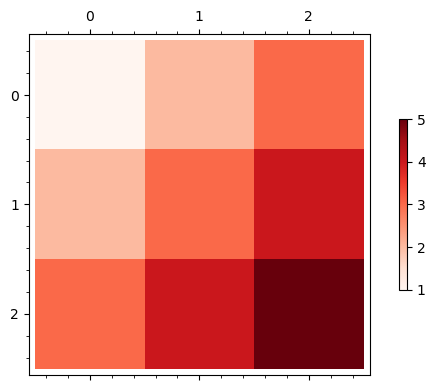

In [4]:
s.show()

### 2. Tas instables

Les cases contenant quatre grains de sable ou plus sont _instables_ : elles peuvent se renverser (_topple_), quatre grains sont alors prélevés d'une telle case et se répartissent chez les quatre voisins immédiats de celle-ci ; si des grains tombent hors de la grille, ils sont perdus.

**À faire**: implémenter une méthode `topple(self,i,j)` qui fait se renverser la case $(i,j)$ de `self` si elle est instable (si elle ne l'est pas, rien ne se passe). On convient de numéroter les cases de $(0,0)$ &ndash; en haut à gauche &ndash; à $(n-1,n-1)$ &ndash; en bas à droite.

Par exemple avec le tas précédent:

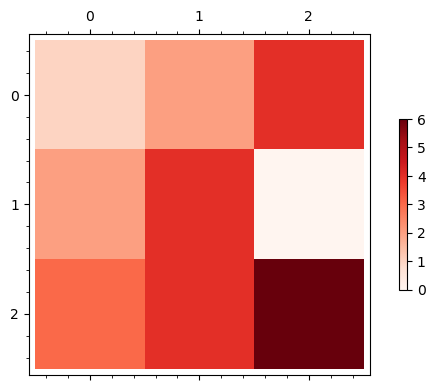

In [5]:
s.topple(1,2)

s == Sandpile([[1,2,4],[2,4,0],[3,4,6]])  # True

s.show()

In [6]:
s.topple(1,1)

s == Sandpile([[1,3,4], [3,0,1], [3,5,6]])  # True

True

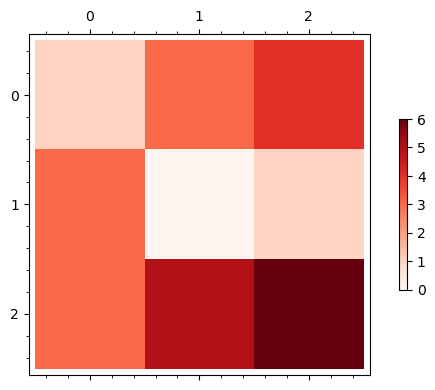

In [7]:
s.show()

### 3. Stabilisation

À force de laisser se renverser les cases instables, on finira par arriver à un tas dans lequel toutes les cases sont stables (s'il y a trop de grains sur la grille, ils finiront par tomber en dehors). Le résultat fondament de la théorie est que le tas stable ainsi obtenu ne dépend pas de l'ordre des renversements effectués.

**À faire**: a) Rajouter une méthode `stabilize(self)` qui renverse les cases instables une à une tant qu'il en reste. Pour la gouverne de l'utilisateur, afficher le nombre de renversements effectués pour atteindre une configuration stable (attention : il a tendance à croître rapidement avec la taille du tas !).

Exemple avec le tas `s` tel qu'il était à la fin de la section précédente :

In [8]:
s.stabilize()  # stable state reached after 6 topplings

s == Sandpile([[3,0,1],[0,3,3],[1,3,3]])  # True

Stabilisation après 6 tupples.


True

b) Observer la stabilisation du tas de sable $21 \times 21$ dont chaque case contient 2 grains, sauf celle du milieu qui en contient 100.

Stabilisation après 33748 tupples.


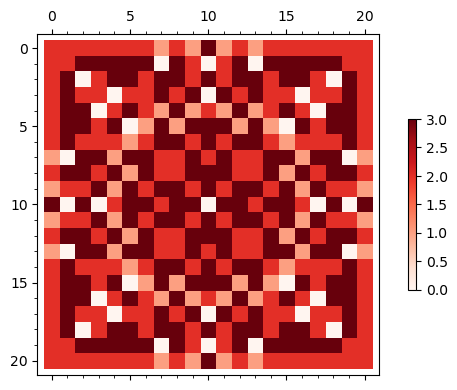

In [9]:
s=Sandpile(ones_matrix(21))

s.mat21(1000)

s.stabilize()

s.show()


### 4. Tas stables

Cette opération de stabilisation permet de définir une loi de composition interne : pour calculer $s + t$, on ajoute tous les grains de $t$ à $s$ case à case et on laisse le tas ainsi obtenu se stabiliser. Cela confère à l'ensemble des tas stables de format $n \times n$ une structure de monoïde commutatif, le neutre étant le tas vide.

**À faire**: Définir l'opérateur d'addition sur les tas de sable. À savoir : `a+b` en Python est équivalent à `a.__add__(b)`.

Exemple :

Stabilisation après 29 tupples.


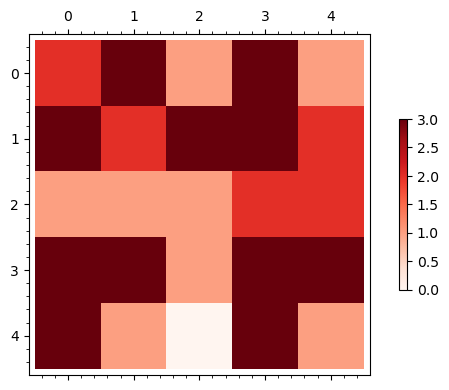

In [10]:
s = Sandpile([[1,1,1,0,1],[1,0,3,1,3],[0,2,2,2,1],[0,1,2,1,0],[3,0,0,1,0]])
t = Sandpile([[1,0,2,0,3],[0,2,2,1,0],[3,1,2,1,1],[0,0,3,3,3],[3,1,3,1,3]])

(s+t).show()  # stable state reached after 29 topplings

![](sage1.png)

### 5. Tas récurrents

Parmi les tas stables, celui dont chaque case contient 3 grains est particulier, puisqu'il est impossible d'y ajouter quoi que ce soit (sauf le tas vide) sans créer d'éboulis. Les tas stables obtenus en ajoutant des grains à ce tas stable maximal sont appelés _récurrents_ ; en effet, on peut montrer qu'ils tendance à apparaître beaucoup plus souvent que ceux qui ne le sont pas. En symboles : les tas récurrents sont les tas de la forme $s_\max + t$, où $s_\max$ désigne le tas de sable maximal et $t$ n'importe quel tas.

**Théorème** : L'ensemble des tas récurrents forme un monoïde commutatif pour la loi +.

Ce qui est intéressant dans ce monoïde, c'est qu'il n'est pas tout à fait évident _a priori_ de dire qui en est le neutre ! En admettant le fait qu'il existe, on peut le déterminer de la façon suivante :

Ce neutre $s_0$ s'écrit sous la forme $s_\max + t$ où $t$ est à déterminer. Le tas maximal $s_\max$ étant récurrent, on doit avoir en particulier $s_\max + s_0 = s_\max$, soit $s_\max + (s_\max + t) = s_\max$.

Cela permet de déterminer $t$ : c'est le tas qu'il faut ajouter à $s_\max + s_\max$ pour remplir chaque case à capacité maximale, _i.e._ le « complément à $s_\max$ de $2 s_\max$ ».

Par ailleurs, on peut vérifier, une fois cette description obtenue, que le tas $s_0 = s_\max + t$ défini ainsi est bien un neutre pour l'ensemble des tas récurrents.

Par exemple : le neutre pour les tas récurrents $5 \times 5$

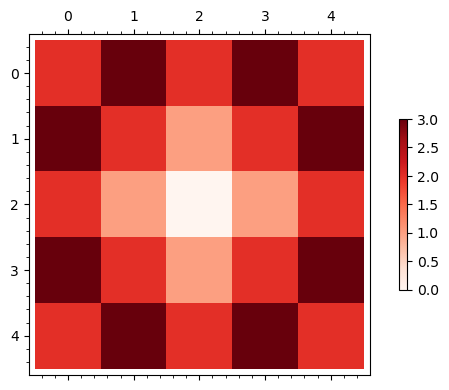

In [11]:
s0 = Sandpile([[2,3,2,3,2],[3,2,1,2,3],[2,1,0,1,2],[3,2,1,2,3],[2,3,2,3,2]])
s0.show()

Vérifions avec un tas récurrent un peu quelconque :

In [12]:
s = Sandpile( 5*[ 5*[3] ]) + Sandpile( [ [ randint(3,10) for i in [0..4] ] for j in [0..4] ] )

Stabilisation après 331 tupples.


In [13]:
s + s0 == s  # True

Stabilisation après 80 tupples.


True

**À faire** : Calculer et afficher graphiquement le neutre $s_0$ pour les tas récurrents $10 \times 10$.

Stabilisation après 1832 tupples.
Stabilisation après 744 tupples.


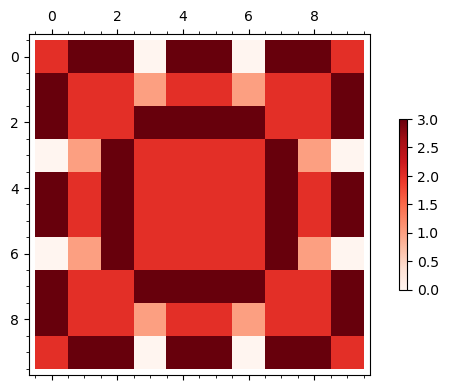

In [14]:
neutre = id_sandpile(10)
neutre.show()

### 6. Jolis tas

Laissez libre court à votre imagination et générez de jolies images de tas stables (voire récurrents) sur des grilles un peu conséquentes !

In [15]:
mat1 = Matrix(500)
mat1[250,250] = 1000

s1 = Sandpile(mat1)
s1.stabilize()

Stabilisation après 18226 tupples.


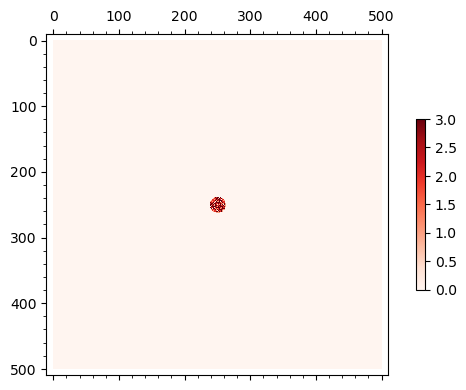

In [16]:
s1.show()

On zoome sur la sphère !

In [17]:
mat2 = Matrix(50)
mat2[25,25] = 5000

s2 = Sandpile(mat1)
s2.stabilize()

Stabilisation après 18226 tupples.


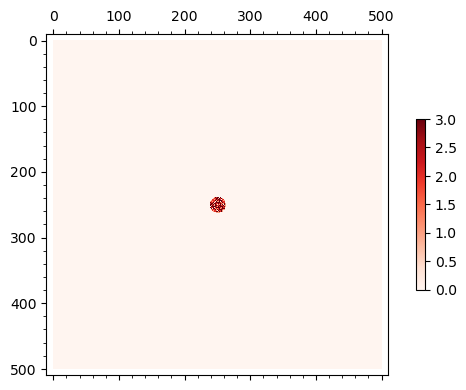

In [18]:
s2.show()